***# Step 1: Download the pre-trained model for the CNN face detector:***

In [1]:
!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2
!bzip2 -dk mmod_human_face_detector.dat.bz2

--2023-06-26 21:40:16--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2.3’

mmod_human_face_det 100%[===================>] 678.43K   966KB/s    in 0.7s    

2023-06-26 21:40:17 (966 KB/s) - ‘mmod_human_face_detector.dat.bz2.3’ saved [694709/694709]

bzip2: Output file mmod_human_face_detector.dat already exists.


***# Step 2: Install face_recognition library and its dependencies:***

In [2]:
!pip install face_recognition
!pip install cmake
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***# Step 3: Import the necessary libraries:***

In [3]:
import cv2
import matplotlib.pyplot as plt
import dlib
import face_recognition
import numpy as np

***# Step 4: Reading/Importing all images with "load_image_file" of face_recognition:***

In [4]:
img1 = face_recognition.load_image_file('/content/1.Saurabh.jpg')
img2 = face_recognition.load_image_file('/content/2.Saurabh.jpg')
img3 = face_recognition.load_image_file('/content/3.Saurabh.jpg')
img4 = face_recognition.load_image_file('/content/4.Saurabh.jpg')
img5 = face_recognition.load_image_file('/content/5.Sourav.jpg')
img6 = face_recognition.load_image_file('/content/6.Saurabh.jpg')

***# Step5: Resizing the images and display the actual image:***

In [5]:
resized_image1 = cv2.resize(img1, (500,600))
resized_image2 = cv2.resize(img2, (500,600))
resized_image3 = cv2.resize(img3, (500,600))
resized_image4 = cv2.resize(img4, (500,600))
resized_image5 = cv2.resize(img5, (500,600))
resized_image6 = cv2.resize(img6, (500,600))

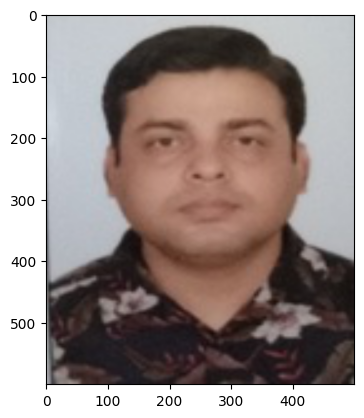

In [6]:
import matplotlib.pyplot as plt
plt.imshow(resized_image1)
plt.show()

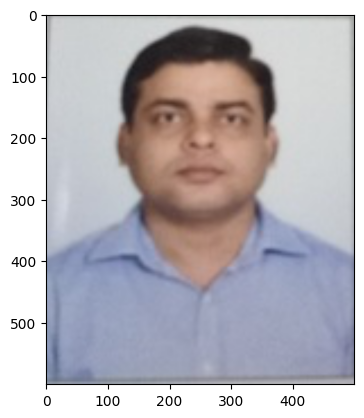

In [7]:
plt.imshow(resized_image2)
plt.show()

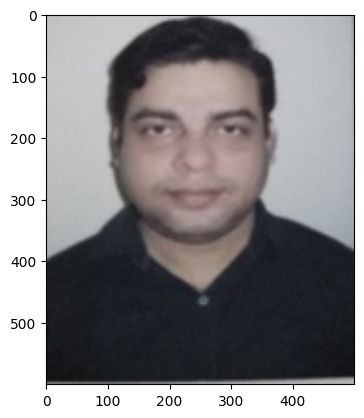

In [8]:
plt.imshow(resized_image3)
plt.show()

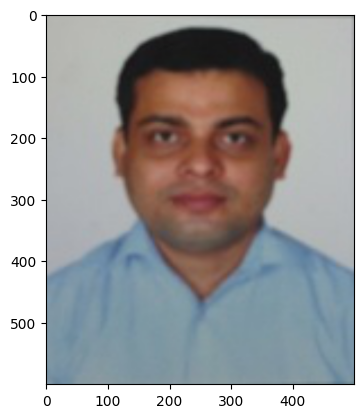

In [9]:
plt.imshow(resized_image4)
plt.show()

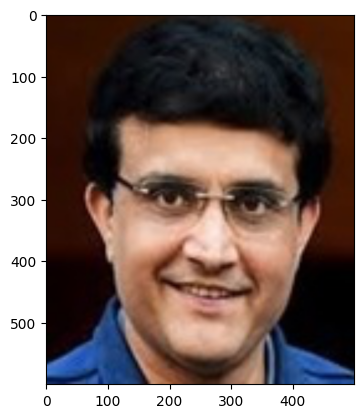

In [10]:
plt.imshow(resized_image5)
plt.show()

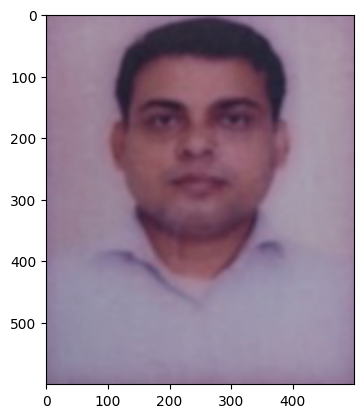

In [11]:
plt.imshow(resized_image6)
plt.show()

***# Step6: Encoding of images with face_encodings of face_recognition:***

In [12]:
import time
start = time.process_time()

img1_encoding = face_recognition.face_encodings(resized_image1)[0]
img2_encoding = face_recognition.face_encodings(resized_image2)[0]
img3_encoding = face_recognition.face_encodings(resized_image3)[0]
img4_encoding = face_recognition.face_encodings(resized_image4)[0]
img5_encoding = face_recognition.face_encodings(resized_image5)[0]
img6_encoding = face_recognition.face_encodings(resized_image6)[0]

print(time.process_time() - start)

2.968489858


In [13]:
face_encoding_list = [img1_encoding, img2_encoding, img3_encoding, img4_encoding, img5_encoding, img6_encoding]

***# Step7: Comparing images with compare_faces of face_recognition***

In [14]:
# Comaring the images(faces) with compare_faces:
new = []
for kface in face_encoding_list:
  for mface in face_encoding_list:
    results = face_recognition.compare_faces([kface], mface, 0.54)
    new.append(results)

In [15]:
newa = np.array(new)
final_matrix = newa.reshape(6,6)

In [16]:
print(final_matrix)

[[ True  True  True  True False  True]
 [ True  True  True  True False  True]
 [ True  True  True  True False  True]
 [ True  True  True  True False  True]
 [False False False False  True False]
 [ True  True  True  True False  True]]


In [17]:
# Comaring the images(faces) with face_distance:
new = []
for kface in face_encoding_list:
  for mface in face_encoding_list:
    results = face_recognition.face_distance([kface], mface)
    new.append(results)

In [18]:
newa = np.array(new)
final_matrix = newa.reshape(6,6)

In [19]:
print(final_matrix)

[[0.         0.28773492 0.37440016 0.3386468  0.68971818 0.34299572]
 [0.28773492 0.         0.26819234 0.31359323 0.71820302 0.27020917]
 [0.37440016 0.26819234 0.         0.36269969 0.75898164 0.33567884]
 [0.3386468  0.31359323 0.36269969 0.         0.71983741 0.26202207]
 [0.68971818 0.71820302 0.75898164 0.71983741 0.         0.71011161]
 [0.34299572 0.27020917 0.33567884 0.26202207 0.71011161 0.        ]]


***# Let's perform some more useful image transformation***

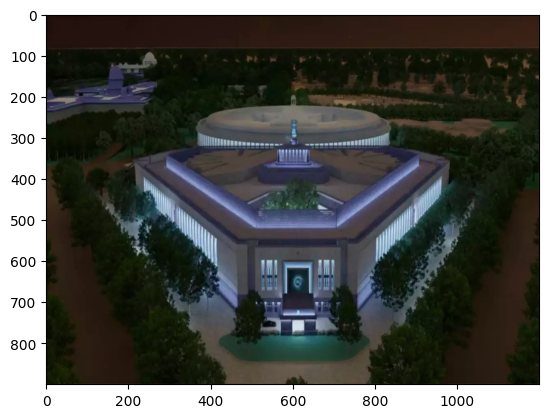

In [20]:
new_parliament = cv2.imread('/content/Parliament.jpg')
plt.imshow(new_parliament)
plt.show()

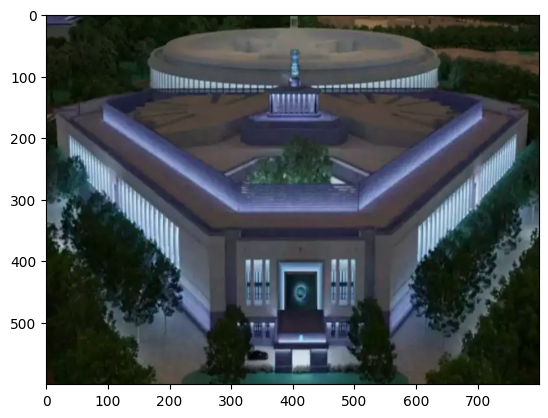

In [21]:
#Extracting a portion(more closer look) from the image
plt.imshow(new_parliament[200:800, 200:1000])
plt.show()

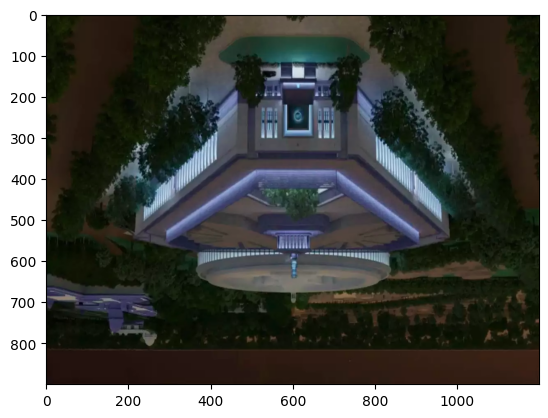

In [22]:
plt.imshow(new_parliament[::-1])
plt.show()